In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
popular_df = pd.read_csv("Popular.csv")
less_popular_df = pd.read_csv("Less Popular.csv")
both = pd.concat([popular_df, less_popular_df])


In [3]:


grouped_df = both.groupby("Website Name").size().reset_index(name="Number of Errors")
merged_df = pd.merge(grouped_df, both[["Website Name", "Website Popularity"]].drop_duplicates(), on="Website Name")

correlation = merged_df["Number of Errors"].corr(merged_df["Website Popularity"], method="pearson")
print("Correlation coefficient:", correlation)

merged_df

Correlation coefficient: 0.4498050846729376


,Website Name,Number of Errors,Website Popularity
0,adobe,3,56
1,adtargeting,2,4451498
2,amazon,3,30
3,amazonaws,3,2
4,apilist,5,4521960
5,barclondon,4,4491348
6,bardcoffee,5,4500433
7,bing,2,3
8,bit.ly,2,70
9,burtsgh,4,4466086


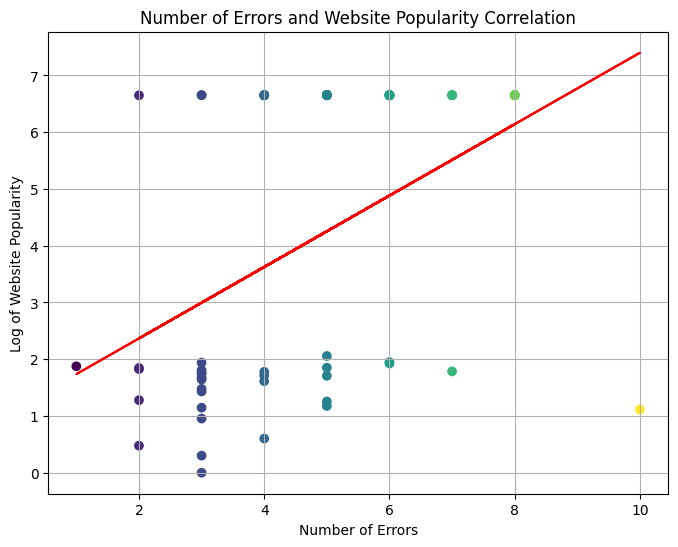

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_df["Number of Errors"], np.log10(merged_df["Website Popularity"]), c=merged_df["Number of Errors"], cmap='viridis')
plt.xlabel("Number of Errors")
plt.ylabel("Log of Website Popularity")
plt.title("Number of Errors and Website Popularity Correlation")

m, b = np.polyfit(merged_df["Number of Errors"], np.log10(merged_df["Website Popularity"]), 1)
plt.plot(merged_df["Number of Errors"], m * merged_df["Number of Errors"] + b, color="red")

# Display the plot
plt.grid(True)

plt.savefig('correlation.pdf', format="pdf", bbox_inches="tight" )
plt.show()

In [8]:
error_counts = both['Error'].value_counts()
# Find the most frequent error
most_frequent_error = error_counts.idxmax()
print(f"The most frequent Error field is: {most_frequent_error}")

error_counts

The most frequent Error field is: Additional Elements 04


Error
Additional Elements 04               38
JavaScript 05                        28
REG_NO_PROMPT                        26
Input Fields 04                      23
4.1.3 Status Messages                20
3.3.2 Labels or Instructions         17
Additional Elements 02               15
REG_FILLED_WRONG_FIELD               14
4.1.2 Name                           13
1.3.5 Identify Input Purpose          8
2.4.3 Focus Order                     8
1.3.1 Info and Relationships          8
1.3.3 Sensory Characteristics         7
Additional Elements 03                6
REG CANT GENERATE                     6
2.1.1 Keyboard                        5
3.3.4 Redundant Entry                 5
REG_REJECTED_PW                       4
Input Fields 01                       3
Non-Standard Forms 04                 3
3.2.2 On Input                        3
Input Fields 05                       2
2.5.3 Label in Name                   2
Additional Elements (Non-Auth) 02     2
Input Fields 07                   